In [2]:
import jax 
from jax import numpy as jnp

2022-06-16 09:19:20.878053: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 09:19:20.960713: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 09:19:20.967404: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


##### Demo of MLP

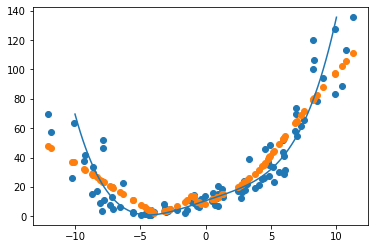

18389.02


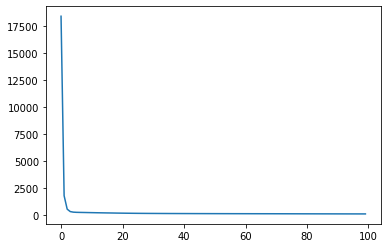

In [114]:
def model_params(layers):
    params = []
    key = jax.random.PRNGKey(512)
    for n_in, n_out in zip(layers[:-1], layers[1:]):
        params.append(dict(w=jax.random.normal(key, (n_in, n_out)), b=jnp.ones(n_out,)))
        key, _ = jax.random.split(key)
    return params

def relu(x):
    return jnp.maximum(x, 0)

def net(params, x):
    *hides, output = params
    for hide in hides:
        x = x @ hide['w'] + hide['b']
        x = relu(x)
    return x @ output['w'] + output['b']

def loss_fn(params, x, y):
    y_hat = net(params, x)
    return jnp.mean((y_hat - y) ** 2)

@jax.jit
def update(params, x, y, lr=1e-5):
    loss, grads = jax.value_and_grad(loss_fn)(params, x, y)
    return loss, jax.tree_map(lambda param, grad: param - lr * grad, params, grads)

n_loop = 100
init_params = model_params([1, 24, 128, 1])
x = jnp.linspace(-10, 10, 100)
x = x[:, None]
y = (3 * x) + (.02 * x ** 2) + (.003 * x ** 3) + (.009 * x ** 4) + 10.6
x = x + jax.random.normal(jax.random.PRNGKey(1024), x.shape)

losses = []
for i in range(n_loop):
    loss, init_params = update(init_params, x, y)
    losses.append(loss)

predictions = net(init_params, x)
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], y, label='Ground truth')
plt.scatter(x[:, 0], predictions, label='Prediction')
plt.plot(jnp.linspace(-10, 10, 100), y)
plt.show()
plt.plot(losses)
print(losses[0])